# Basic usage of oatomobile

In [1]:
%load_ext autoreload
%autoreload 2

## Use as gym environment

In [1]:
import oatomobile
from oatomobile.envs import CARLAEnv
import matplotlib.pyplot as plt
%matplotlib inline

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


### Test weather

In [89]:
environment = CARLAEnv(town="Town01", weather="ClearSunset")

In [90]:
observation = environment.reset()

/apps/conda/wyao1/envs/py35/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


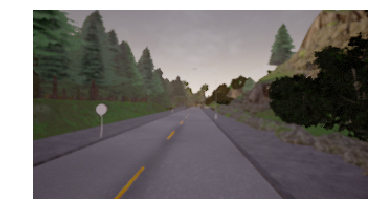

In [229]:
plt.imshow(observation['front_camera_rgb'])
plt.axis('off');

### Test autopilot

In [91]:
# Rule-based agents.
import oatomobile.baselines.rulebased
agent = oatomobile.baselines.rulebased.AutopilotAgent(environment=environment)

In [230]:
action = agent.act(observation)
new_observation, reward, done, info = environment.step(action)
agent.update(observation, action, new_observation)
observation = new_observation

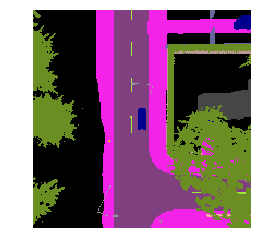

In [41]:
plt.imshow(observation['bird_view_camera_cityscapes'])
plt.axis('off');

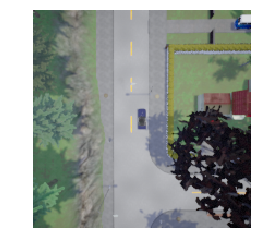

In [36]:
plt.imshow(observation['bird_view_camera_rgb'])
plt.axis('off');

(0, 16)

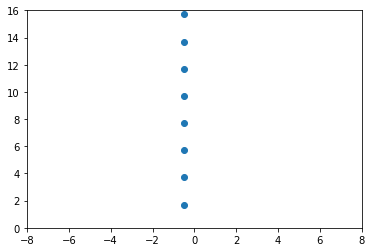

In [38]:
plt.scatter(observation['goal'][:,1], observation['goal'][:,0])
plt.xlim([-8,8])
plt.ylim([0,16])

In [88]:
environment.close()

### Test data collector and post-processing

In [2]:
from oatomobile.datasets.carla import CARLADataset

In [3]:
data = CARLADataset("raw")

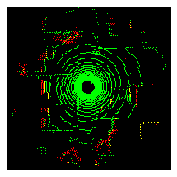

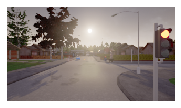

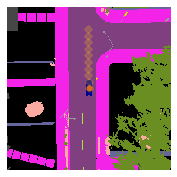

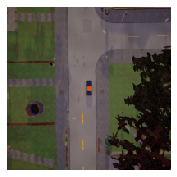

In [23]:
data.plot_datum("process_dir/001d854e0a524bcaade0ab262a276584.npz",
                "cache/output_dir")

In [ ]:
data.process(
    dataset_dir =  "cache/",
    output_dir =   "process_dir",    
    future_length = 80,
    past_length = 20,
    num_frame_skips = 5,
             )

In [9]:
import numpy as np

In [29]:
datum = np.load("process_dir/bf88cbd9987943a8a486f8731c50bcc6.npz")

In [30]:
datum.files

['lane_invasion',
 'rotation',
 'velocity',
 'control',
 'lidar',
 'predictions',
 'player_future',
 'front_camera_rgb',
 'collision',
 'goal',
 'is_at_traffic_light',
 'bird_view_camera_rgb',
 'traffic_light_state',
 'location',
 'bird_view_camera_cityscapes',
 'player_past']

In [33]:
datum['goal']

array([[ 0.05623686, -0.0297336 , -0.02662943],
       [ 2.0560293 , -0.05853968, -0.02663984],
       [ 4.055822  , -0.08734196, -0.02665025],
       [ 6.0556145 , -0.11614804, -0.02666066],
       [ 8.055408  , -0.14495413, -0.02667107],
       [10.0552    , -0.1737602 , -0.02668148],
       [12.054993  , -0.2025663 , -0.02669189],
       [14.054785  , -0.23137239, -0.02670231],
       [16.054592  , -0.2601787 , -0.02671272],
       [18.054384  , -0.28898478, -0.02672313]], dtype=float32)

In [31]:
datum['player_past']

array([[-3.82453258e-09, -1.22358464e-07, -3.96080296e-04],
       [-2.56809366e-09, -8.21611503e-08, -2.65959638e-04],
       [-1.24169071e-09, -3.97254737e-08, -1.28593290e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [-3.36077356e-09, -1.07521398e-07, -3.48051993e-04],
       [-4.86473048e-09, -1.55637568e-07, -5.03806373e-04],
       [-4.75386716e-09, -1.52090712e-07

In [32]:
datum['player_future']

array([[ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [-3.36077356e-09, -1.07521398e-07, -3.48051993e-04],
       [-4.86473048e-09, -1.55637568e-07, -5.03806373e-04],
       [-4.75386716e-09, -1.52090712e-07, -4.92325029e-04],
       [ 2.99068551e-03, -2.37842618e-05, -4.70488465e-04],
       [ 5.82798712e-03, -1.02425044e-04, -3.61543585e-04],
       [ 9.59706943e-03, -1.18074541e-04, -2.60180188e-04],
       [ 1.17637620e-02, -1.37509662e-04, -4.89748611e-05],
       [ 1.53950930e-02, -1.81723518e-04